## Home Credit Default Risk
Can you predict how capable each applicant is of repaying a loan?

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import gc
import sys
sys.path.append('../')

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)
from IPython.display import HTML, display

MERED = "merged"
#PATH = "../../../data/home-credit-default-risk/"
PATH = "../../data/home-credit-default-risk/"

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy m

In [12]:
ls {PATH}

application_test.csv       credit_card_balance.csv.zip
application_test.csv.zip   HomeCredit_columns_description.csv
application_train.csv      installments_payments.csv
application_train.csv.zip  installments_payments.csv.zip
bureau_balance.csv         POS_CASH_balance.csv
bureau_balance.csv.zip     POS_CASH_balance.csv.zip
bureau.csv                 previous_application.csv
bureau.csv.zip             previous_application.csv.zip
credit_card_balance.csv    sample_submission.csv.zip


In [11]:
#columns_description = pd.read_csv(f'{PATH}HomeCredit_columns_description.csv')
!unzip -ux '{PATH}application_test.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}application_train.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}bureau_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}bureau.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}credit_card_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}installments_payments.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}POS_CASH_balance.csv.zip' -d '{PATH}'
!unzip -ux '{PATH}previous_application.csv.zip' -d '{PATH}'
#!unzip -ux '{PATH}sample_submission.csv.zip' -d '{PATH}'


Archive:  ../../data/home-credit-default-risk/application_test.csv.zip
  inflating: ../../data/home-credit-default-risk/application_test.csv  
Archive:  ../../data/home-credit-default-risk/application_train.csv.zip
  inflating: ../../data/home-credit-default-risk/application_train.csv  
Archive:  ../../data/home-credit-default-risk/bureau_balance.csv.zip
  inflating: ../../data/home-credit-default-risk/bureau_balance.csv  
Archive:  ../../data/home-credit-default-risk/bureau.csv.zip
  inflating: ../../data/home-credit-default-risk/bureau.csv  
Archive:  ../../data/home-credit-default-risk/credit_card_balance.csv.zip
  inflating: ../../data/home-credit-default-risk/credit_card_balance.csv  
Archive:  ../../data/home-credit-default-risk/installments_payments.csv.zip
  inflating: ../../data/home-credit-default-risk/installments_payments.csv  
Archive:  ../../data/home-credit-default-risk/POS_CASH_balance.csv.zip
  inflating: ../../data/home-credit-default-risk/POS_CASH_balance.csv  
Archi

### The 'bureau_balance' and 'bureau' being been merged

In [13]:
file_names = ['bureau_balance', 'bureau']

# file_names = ['application_train', 'application_test', 'bureau', 'credit_card_balance', 
#          'installments_payments', 'POS_CASH_balance', 'previous_application']

tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]


In [14]:
for t in tables: display(t.head())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
for t in tables: display(DataFrameSummary(t).summary())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.72999e+07,2.72999e+07,NaN
mean,6.0363e+06,-30.7417,NaN
std,492349,23.8645,NaN
min,5.00171e+06,-96,NaN
25%,5.73093e+06,-46,NaN
50%,6.07082e+06,-25,NaN
75%,6.43195e+06,-11,NaN
max,6.84289e+06,0,NaN
counts,27299925,27299925,27299925
uniques,817395,97,8


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.71643e+06,1.71643e+06,NaN,NaN,1.71643e+06,1.71643e+06,1.61088e+06,1.08278e+06,591940,1.71643e+06,1.71642e+06,1.45876e+06,1.12465e+06,1.71643e+06,NaN,1.71643e+06,489637
mean,278215,5.92443e+06,NaN,NaN,-1142.11,0.818167,510.517,-1017.44,3825.42,0.00641041,354995,137085,6229.51,37.9128,NaN,-593.748,15712.8
std,102939,532266,NaN,NaN,795.165,36.5444,4994.22,714.011,206032,0.0962239,1.14981e+06,677401,45032,5937.65,NaN,720.747,325827
min,100001,5e+06,NaN,NaN,-2922,0,-42060,-42023,0,0,0,-4.7056e+06,-586406,0,NaN,-41947,0
25%,188867,5.46395e+06,NaN,NaN,-1666,0,-1138,-1489,0,0,51300,0,0,0,NaN,-908,0
50%,278055,5.9263e+06,NaN,NaN,-987,0,-330,-897,0,0,125518,0,0,0,NaN,-395,0
75%,367426,6.38568e+06,NaN,NaN,-474,0,474,-425,0,0,315000,40153.5,0,0,NaN,-33,13500
max,456255,6.84346e+06,NaN,NaN,0,2792,31199,0,1.15987e+08,9,5.85e+08,1.701e+08,4.7056e+06,3.75668e+06,NaN,372,1.18453e+08
counts,1716428,1716428,1716428,1716428,1716428,1716428,1610875,1082775,591940,1716428,1716415,1458759,1124648,1716428,1716428,1716428,489637
uniques,305811,1716428,4,4,2923,942,14096,2917,68251,10,236708,226537,51726,1616,15,2982,40321


In [15]:
bb = tables[0]
b = tables[1]

In [16]:
display(bb.head())
display(b.head())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


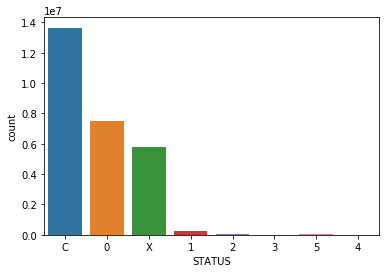

In [11]:
sns.countplot(bb.STATUS)

In [17]:
bb_agr = {'MONTHS_BALANCE': ['min', 'max', 'mean', 'size']}
bb_agg = bb.groupby('SK_ID_BUREAU', as_index=True).agg(bb_agr)

In [18]:
bb_agg.columns

MultiIndex(levels=[['MONTHS_BALANCE'], ['min', 'max', 'mean', 'size']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]])

In [19]:
bb_agg.head()

MONTHS_BALANCE               
                        min max  mean size
SK_ID_BUREAU                              
5001709                 -96   0 -48.0   97
5001710                 -82   0 -41.0   83
5001711                  -3   0  -1.5    4
5001712                 -18   0  -9.0   19
5001713                 -21   0 -10.5   22

In [20]:
bb_agg.columns=pd.MultiIndex.from_arrays([['min', 'max', 'mean', 'size']])

In [7]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [22]:
merged = join_df(b, bb_agg, 'SK_ID_BUREAU', 'SK_ID_BUREAU')

In [23]:
merged[merged.SK_ID_BUREAU == 5001711] 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,"(min,)","(max,)","(mean,)","(size,)"
62915,162368,5001711,Active,currency 1,-115,0,30865.0,NaN,NaN,0,...,213885.0,NaN,0.0,Credit card,-30,0.0,-3.0,0.0,-1.5,4.0


In [27]:
merged[merged.MIN == -31.0] 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MIN,MAX,MEAN,SIZE
2288,233261,5717315,Active,currency 1,-958,0,140.0,NaN,0.000,1,...,42685.290,2314.71,0.0,Credit card,-5,8460.000,-31.0,-25.0,-28.0,7.0
2346,391046,5717375,Closed,currency 1,-956,0,-591.0,-619.0,NaN,0,...,0.000,NaN,0.0,Consumer credit,-617,7762.500,-31.0,-21.0,-26.0,11.0
3222,106514,5718437,Closed,currency 1,-958,0,137.0,-871.0,NaN,0,...,NaN,NaN,0.0,Consumer credit,-871,0.000,-31.0,0.0,-15.5,32.0
3252,239144,5718472,Closed,currency 1,-955,0,-227.0,-227.0,6237.450,0,...,0.000,0.00,0.0,Consumer credit,-227,NaN,-31.0,0.0,-15.5,32.0
3271,408406,5718494,Closed,currency 1,-951,0,-190.0,-647.0,NaN,0,...,0.000,NaN,0.0,Consumer credit,-637,NaN,-31.0,0.0,-15.5,32.0
3315,267443,5718545,Closed,currency 1,-969,0,-331.0,-359.0,NaN,0,...,0.000,NaN,0.0,Consumer credit,-4,NaN,-31.0,0.0,-15.5,32.0
3388,397119,5718628,Active,currency 1,-965,0,1095.0,NaN,NaN,0,...,149481.000,NaN,0.0,Credit card,0,7717.500,-31.0,0.0,-15.5,32.0
3535,150267,5718798,Active,currency 1,-957,0,10003.0,NaN,3174.120,0,...,90135.990,8864.01,0.0,Credit card,-16,4519.800,-31.0,0.0,-15.5,32.0
3772,269489,5719058,Closed,currency 1,-966,0,-819.0,-819.0,0.000,0,...,0.000,0.00,0.0,Consumer credit,-819,NaN,-31.0,0.0,-15.5,32.0
3861,276444,5719163,Active,currency 1,-972,0,351.0,NaN,NaN,0,...,208669.500,0.00,0.0,Credit card,-196,NaN,-31.0,0.0,-15.5,32.0


In [26]:
list(merged.columns.values)

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY',
 'MIN',
 'MAX',
 'MEAN',
 'SIZE']

In [25]:
merged.columns = ['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
                  'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY',
 'MIN',
 'MAX',
 'MEAN',
 'SIZE']

In [28]:
os.mkdir(f'{PATH}{MERED}/')
merged.to_csv(f'{PATH}{MERED}/bureau_with_balance.csv', index=False)

In [29]:
del b, bb, merged, tables

### Merge previous_application with installments_payments

In [43]:
file_names = ['previous_application', 'installments_payments']
tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]

In [44]:
for t in tables: display(t.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [17]:
for t in tables: display(DataFrameSummary(t).summary())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.67021e+06,1.67021e+06,NaN,1.29798e+06,1.67021e+06,1.67021e+06,774370,1.2847e+06,NaN,1.67021e+06,...,NaN,1.29798e+06,NaN,NaN,997149,997149,997149,997149,997149,997149
mean,1.92309e+06,278357,NaN,15955.1,175234,196114,6697.4,227847,NaN,12.4842,...,NaN,16.0541,NaN,NaN,342210,13826.3,33767.8,76582.4,81992.3,0.33257
std,532598,102815,NaN,14782.1,292780,318575,20921.5,315397,NaN,3.33403,...,NaN,14.5673,NaN,NaN,88916.1,72444.9,106857,149647,153304,0.471134
min,1e+06,100001,NaN,0,0,0,-0.9,0,NaN,0,...,NaN,0,NaN,NaN,-2922,-2892,-2801,-2889,-2874,0
25%,1.46186e+06,189329,NaN,6321.78,18720,24160.5,0,50841,NaN,10,...,NaN,6,NaN,NaN,365243,-1628,-1242,-1314,-1270,0
50%,1.92311e+06,278714,NaN,11250,71046,80541,1638,112320,NaN,12,...,NaN,12,NaN,NaN,365243,-831,-361,-537,-499,0
75%,2.38428e+06,367514,NaN,20658.4,180360,216418,7740,234000,NaN,15,...,NaN,24,NaN,NaN,365243,-411,129,-74,-44,1
max,2.84538e+06,456255,NaN,418058,6.90516e+06,6.90516e+06,3.06004e+06,6.90516e+06,NaN,23,...,NaN,84,NaN,NaN,365243,365243,365243,365243,365243,1
counts,1670214,1670214,1670214,1297979,1670214,1670213,774370,1284699,1670214,1670214,...,1670214,1297984,1670214,1669868,997149,997149,997149,997149,997149,997149
uniques,1670214,338857,4,357959,93885,86803,29278,93885,7,24,...,11,49,5,17,2838,2892,4605,2873,2830,2


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.36054e+07,1.36054e+07,1.36054e+07,1.36054e+07,1.36054e+07,1.36025e+07,1.36054e+07,1.36025e+07
mean,1.90336e+06,278445,0.856637,18.8709,-1042.27,-1051.11,17050.9,17238.2
std,536203,102718,1.03522,26.6641,800.946,800.586,50570.3,54735.8
min,1e+06,100001,0,1,-2922,-4921,0,0
25%,1.43419e+06,189639,0,4,-1654,-1662,4226.09,3398.26
50%,1.89652e+06,278685,1,8,-818,-827,8884.08,8125.52
75%,2.36909e+06,367530,1,19,-361,-370,16710.2,16108.4
max,2.8435e+06,456255,178,277,-1,-1,3.77149e+06,3.77149e+06
counts,13605401,13605401,13605401,13605401,13605401,13602496,13605401,13602496
uniques,997752,339587,65,277,2922,3039,902539,944235


In [45]:
payments = tables[1]

In [46]:
payments[payments.SK_ID_PREV == 2085231]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
181872,2085231,193053,3.0,1,-44.0,-21.0,631.035,631.035
2236835,2085231,193053,3.0,2,-14.0,-21.0,8393.175,8393.175


In [48]:
payments.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [49]:
payment_agr = {'NUM_INSTALMENT_NUMBER': 'max',
               'DAYS_INSTALMENT': 'sum',
               'DAYS_ENTRY_PAYMENT': 'sum',
               'AMT_INSTALMENT': 'sum',
               'AMT_PAYMENT': 'sum',
              }
payments_agg = payments.groupby('SK_ID_PREV', as_index=True).agg(payment_agr)

In [55]:
payments_agg.head()

,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT_DELTA,AMT_INSTALMENT_DELTA
SK_ID_PREV,,,
1000001,2,32.0,0.000
1000002,4,79.0,0.000
1000003,3,46.0,0.000
1000004,7,187.0,0.000
1000005,10,93.0,14713.605


In [51]:
payments_agg['DAYS_INSTALMENT_DELTA'] = payments_agg['DAYS_INSTALMENT'] - payments_agg['DAYS_ENTRY_PAYMENT']

In [52]:
payments_agg['AMT_INSTALMENT_DELTA'] = payments_agg['AMT_INSTALMENT'] - payments_agg['AMT_PAYMENT']

In [53]:
payments_agg.drop(['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'], axis=1, inplace=True)

In [56]:
payments_agg.columns

Index(['NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT_DELTA',
       'AMT_INSTALMENT_DELTA'],
      dtype='object')

In [57]:
merged = join_df(tables[0], payments_agg, 'SK_ID_PREV', 'SK_ID_PREV')

In [12]:
del merged

In [58]:
display(merged.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT_DELTA,AMT_INSTALMENT_DELTA
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,5.0,46.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,9.0,74.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,11.0,78.0,0.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
display(DataFrameSummary(merged).summary())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT_DELTA,AMT_INSTALMENT_DELTA
count,1.67021e+06,1.67021e+06,NaN,1.29798e+06,1.67021e+06,1.67021e+06,774370,1.2847e+06,NaN,1.67021e+06,...,NaN,997149,997149,997149,997149,997149,997149,958905,958905,958905
mean,1.92309e+06,278357,NaN,15955.1,175234,196114,6697.4,227847,NaN,12.4842,...,NaN,342210,13826.3,33767.8,76582.4,81992.3,0.33257,13.1162,119.536,-2788.6
std,532598,102815,NaN,14782.1,292780,318575,20921.5,315397,NaN,3.33403,...,NaN,88916.1,72444.9,106857,149647,153304,0.471134,17.0213,244.053,97696.5
min,1e+06,100001,NaN,0,0,0,-0.9,0,NaN,0,...,NaN,-2922,-2892,-2801,-2889,-2874,0,1,-82910,-3.195e+06
25%,1.46186e+06,189329,NaN,6321.78,18720,24160.5,0,50841,NaN,10,...,NaN,365243,-1628,-1242,-1314,-1270,0,6,44,0
50%,1.92311e+06,278714,NaN,11250,71046,80541,1638,112320,NaN,12,...,NaN,365243,-831,-361,-537,-499,0,10,88,0
75%,2.38428e+06,367514,NaN,20658.4,180360,216418,7740,234000,NaN,15,...,NaN,365243,-411,129,-74,-44,1,12,156,0
max,2.84538e+06,456255,NaN,418058,6.90516e+06,6.90516e+06,3.06004e+06,6.90516e+06,NaN,23,...,NaN,365243,365243,365243,365243,365243,1,277,10529,2.60235e+06
counts,1670214,1670214,1670214,1297979,1670214,1670213,774370,1284699,1670214,1670214,...,1669868,997149,997149,997149,997149,997149,997149,958905,958905,958905
uniques,1670214,338857,4,357959,93885,86803,29278,93885,7,24,...,17,2838,2892,4605,2873,2830,2,196,4078,213605


In [61]:
merged.to_csv(f'{PATH}{MERED}/previous_with_payment.csv', index=False)

### Merge other POS_CASH_balance

In [65]:
pos_cash = pd.read_csv(f'{PATH}/POS_CASH_balance.csv',low_memory=False)

In [66]:
display(pos_cash.head())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [67]:
display(DataFrameSummary(pos_cash).summary())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.00014e+07,1.00014e+07,1.00014e+07,9.97529e+06,9.97527e+06,NaN,1.00014e+07,1.00014e+07
mean,1.90322e+06,278404,-35.0126,17.0897,10.4838,NaN,11.6069,0.654468
std,535847,102764,26.0666,11.9951,11.1091,NaN,132.714,32.7625
min,1e+06,100001,-96,1,0,NaN,0,0
25%,1.43440e+06,189550,-54,10,3,NaN,0,0
50%,1.89656e+06,278654,-28,12,7,NaN,0,0
75%,2.36896e+06,367429,-13,24,14,NaN,0,0
max,2.8435e+06,456255,-1,92,85,NaN,4231,3595
counts,10001358,10001358,10001358,9975287,9975271,10001358,10001358,10001358
uniques,936325,337252,96,73,79,9,3400,2307


In [8]:
merged = join_df(merged, tables, 'SK_ID_PREV', 'SK_ID_PREV')

NameError: name 'merged' is not defined

In [55]:
del tables